In [1]:
## Bowling Analysis
#Bowler performance based on economy rate and wickets.


In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="cricket_ml"
)


In [2]:
query = """
SELECT
    p.player_name AS bowler,
    COUNT(CASE WHEN bd.is_wicket = 1 THEN 1 END) AS wickets,
    SUM(bd.runs_total) AS runs_conceded,
    COUNT(*) AS balls
FROM ball_delivery bd
JOIN player p ON bd.bowler_id = p.player_id
GROUP BY p.player_name
HAVING balls >= 24
"""
df = pd.read_sql(query, conn)


C:\Users\hp\AppData\Local\Temp\ipykernel_29796\3586635392.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


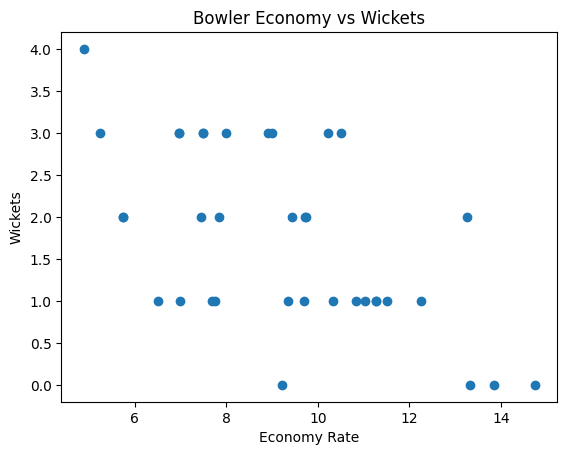

In [3]:
df["overs"] = df["balls"] / 6
df["economy"] = df["runs_conceded"] / df["overs"]

plt.figure()
plt.scatter(df["economy"], df["wickets"])
plt.xlabel("Economy Rate")
plt.ylabel("Wickets")
plt.title("Bowler Economy vs Wickets")
plt.show()


(88, 6)


C:\Users\hp\AppData\Local\Temp\ipykernel_29796\69864942.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Text(0.5, 1.0, 'Dot Ball %')

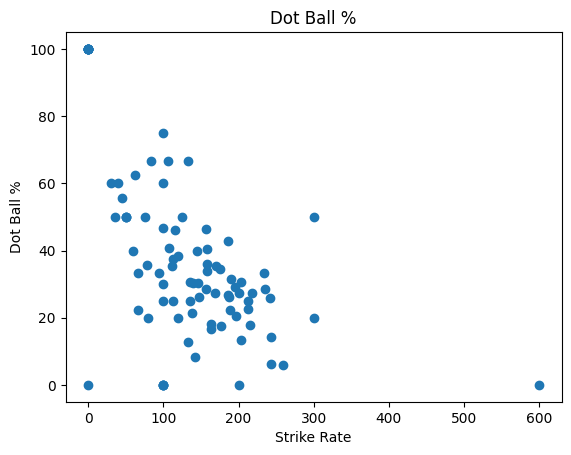

In [4]:
query = """
SELECT
    p.player_name,
    COUNT(*) AS balls,
    SUM(bd.runs_batter) AS runs,
    SUM(CASE WHEN bd.runs_total = 0 THEN 1 ELSE 0 END) AS dot_balls
FROM ball_delivery bd
JOIN player p ON bd.batter_id = p.player_id
GROUP BY p.player_name
HAVING balls >= 1
"""
df = pd.read_sql(query, conn)

df["strike_rate"] = (df["runs"] / df["balls"]) * 100
df["dot_ball_pct"] = (df["dot_balls"] / df["balls"]) * 100
print(df.shape)
df.head()

plt.figure()
plt.scatter(df["strike_rate"], df["dot_ball_pct"])
plt.xlabel("Strike Rate")
plt.ylabel("Dot Ball %")
plt.title("Dot Ball %")


C:\Users\hp\AppData\Local\Temp\ipykernel_29796\3674381151.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


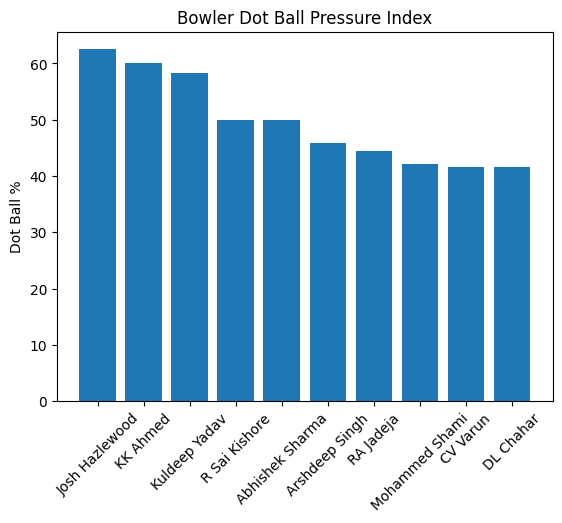

In [5]:
query = """
SELECT
    p.player_name AS bowler,
    COUNT(*) AS balls,
    SUM(CASE WHEN bd.runs_total = 0 THEN 1 ELSE 0 END) AS dot_balls
FROM ball_delivery bd
JOIN player p ON bd.bowler_id = p.player_id
GROUP BY p.player_name
"""
df = pd.read_sql(query, conn)

df["dot_ball_pct"] = (df["dot_balls"] / df["balls"]) * 100

df = df.sort_values("dot_ball_pct", ascending=False).head(10)

plt.figure()
plt.bar(df["bowler"], df["dot_ball_pct"])
plt.xticks(rotation=45)
plt.ylabel("Dot Ball %")
plt.title("Bowler Dot Ball Pressure Index")
plt.show()
